In [80]:
import numpy as np
from neuraltda import SLSEMetric as slse
import neuraltda.Annealer as an
reload(an)

<module 'neuraltda.Annealer' from '/home/brad/code/NeuralTDA/neuraltda/Annealer.pyc'>

In [ ]:
myslse = slse.SLSEMetric([], 1, 13.0)

In [ ]:
myslse.error([], 1)

In [2]:
class simplesys:
    
    def __init__(self, center):
        self.center = center
        
    def initialize(self):
        return 100*np.random.randn()
    
    def run(self, s):
        return s
    
class sqloss:
    
    def __init__(self, center):
        self.center = center
        
    def error(self, x):
        return (self.center - x)**2

In [ ]:
sys = simplesys(4)
loss = sqloss(3.5)
annealer = an.Annealer(loss, sys, 0.001)

In [ ]:
annealer.anneal(10000)

In [3]:
import brian2
%matplotlib inline

In [ ]:
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''
G = NeuronGroup(3, eqs, threshold='v>1', reset='v = 0', method='linear')
G.I = [2, 0, 0]
G.tau = [10, 100, 100]*ms

# Comment these two lines out to see what happens without Synapses
S = Synapses(G, G, 'w : 1', on_pre='v_post += w')
S.connect(i=0, j=[1, 2])
S.w = 'j*0.2'

M = StateMonitor(G, 'v', record=True)

run(50*ms)

plot(M.t/ms, M.v[0], '-b', label='Neuron 0')
plot(M.t/ms, M.v[1], '-g', lw=2, label='Neuron 1')
plot(M.t/ms, M.v[2], '-r', lw=2, label='Neuron 1')
xlabel('Time (ms)')
ylabel('v')
legend(loc='best');

In [ ]:
start_scope()

N = 25
tau = 10*ms
v0_max = 3.
duration = 4000*ms
sigma = 0.2

eqs = '''
dv/dt = (v0-v)/tau+sigma*xi*tau**-0.5 : 1 (unless refractory)
v0 : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='euler')
M = SpikeMonitor(G)

G.v0 = 0.7

# Comment these two lines out to see what happens without Synapses
S = Synapses(G, G, 'w : 1', on_pre='v_post += w')
S.connect(p=0.1)
S.w = 'randn()'
S.delay = 1*ms

run(duration)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')
ylabel('Firing rate (sp/s)');



In [52]:
import pandas as pd
class SpikingNetwork:
    fs = 40000
    N = 25
    tau = 10*brian2.ms
    v0_max = 3.
    duration = 4000*brian2.ms
    sigma = 0.2
    
    def __init__(self):
        brian2.start_scope()
        
        eqs = '''
        dv/dt = (v0-v)/tau+sigma*xi*tau**-0.5 : 1 (unless refractory)
        v0 : 1
        tau : second
        sigma : 1
        '''

        self.G = brian2.NeuronGroup(self.N, eqs, threshold='v>1', reset='v=0', refractory=5*brian2.ms, method='euler')
        self.M = brian2.SpikeMonitor(self.G)

        self.G.v0 = 0.7
        self.G.tau = self.tau
        self.G.sigma=self.sigma
        # Comment these two lines out to see what happens without Synapses
        self.S = brian2.Synapses(self.G, self.G, 'w : 1', on_pre='v_post += w')
        self.S.connect(p=0.1)
        self.S.w = 'randn()'
        self.S.delay = 1*brian2.ms
        
        self.net = brian2.Network()
        self.net.add(self.G, self.M, self.S)
        
    def initialize(self):
        return np.array(self.S.w)
    
    def run(self, weights=None):
        if weights:
            self.S.w = weights
        self.net.run(self.duration)
        sptrains = self.M.spike_trains()
        spikes = pd.DataFrame(data={'cluster': self.M.i, 'time_samples': np.int_(np.array(self.M.t)*self.fs), 'recording': len(self.M.t)*[0]})
        spikes = spikes.sort(columns='time_samples')
        stim_trials = pd.DataFrame(data={'time_samples': [0], 'stimulus_end': [float(self.duration)]})
        clusters_list = range(self.N)
        
        return spikes

In [11]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

In [ ]:
visualise_connectivity(S)

In [ ]:
S.w = np.random.standard_normal(np.shape(S.w))

In [ ]:
S.w

In [ ]:
np.array(S.w)

In [ ]:
len(M.t)

In [98]:
import neuraltda.SpikingNetwork as sn
reload(sn)

<module 'neuraltda.SpikingNetwork' from '/home/brad/code/NeuralTDA/neuraltda/SpikingNetwork.py'>

In [84]:
t1 = sn.SpikingNetwork(10.0, 5.0)

In [85]:
test = t1.run()

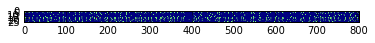

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(test[:, :, 0])

In [283]:
import neuraltda.simpComp as sc
reload(slse)
reload(sn)
reload(an)



<module 'neuraltda.Annealer' from '/home/brad/code/NeuralTDA/neuraltda/Annealer.pyc'>

In [284]:
targ = sc.simplicialChainGroups([(1,2,3), (2,3,4), (1,4,7,9), (3,9)])
loss = slse.SLSEMetric(targ, 1, 6.0)
sys = sn.SpikingNetwork(10.0, 5.0)
annealer = an.Annealer(loss, sys, 10.0)

In [241]:
annealer.anneal(100)

INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.03s). [brian2.stateupdaters.base.method_choice]
WARNING    /home/brad/code/NeuralTDA/neuraltda/SpikingNetwork.py:86: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  new_spikes = new_spikes.sort(columns='time_samples')
 [py.warnings]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       

0
1
2
3
4
Status: 0/100, E: inf, E_new: 0.096276644567, Temp: 0.0735758882343


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 1/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0728364383267


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 2/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0720895577196


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 3/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0713351741239


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 4/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0705732162918


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 5/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0698036141863


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 6/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0690262991661


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 7/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0682412041846


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 8/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0674482640047


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 9/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0666474154312


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 10/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0658385975616


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 11/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0650217520561


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 12/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0641968234298


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 13/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0633637593671


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 14/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0625225110612


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 15/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0616730335793


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 16/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.060815286257


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 17/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0599492331225


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 18/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0590748433542


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 19/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0581920917729


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 20/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.057300959372


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 21/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0564014338886


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 22/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0554935104173


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 23/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0545771920713


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 24/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.053652490694


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 25/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0527194276231


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 26/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0517780345137


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 27/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0508283542219


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 28/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0498704417555


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 29/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0489043652945


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 30/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0479302072884


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 31/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0469480656329


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 32/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0459580549346


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 33/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.044960307866


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 34/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0439549766201


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 35/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0429422344683


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 36/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0419222774302


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 37/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0408953260596


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 38/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0398616273559


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 39/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0388214568065


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 40/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0377751205675


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 41/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0367229577887


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 42/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0356653430912


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 43/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0346026892017


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 44/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0335354497504


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 45/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0324641222364


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 46/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0313892511641


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 47/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0303114313523


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 48/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0292313114143


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 49/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0281495974082


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 50/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0270670566473


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 51/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.025984521661


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 52/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0249028942888


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 53/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0238231498828


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 54/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0227463415862


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 55/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0216736046444


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 56/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0206061606924


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 57/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.019545321947


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 58/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0184924952126


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 59/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0174491855866


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 60/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0164169997248


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 61/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0153976484921


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 62/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0143929487883


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 63/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0134048242905


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.03s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 64/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0124353048044


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 65/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0114865238535


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 66/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0105607140669


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 67/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.00966019984835


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 68/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.00878738672468


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 69/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.00794474667729


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 70/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.00713479866945


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 71/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.00636008348908


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 72/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.00562313194979


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 73/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.00492642544323


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 74/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.004272347835


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 75/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.00366312777775


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 76/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0031007707198


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 77/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.00258698027779


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 78/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.0021230692924


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 79/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.00170986189594


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 80/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.00134758939982


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 81/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.00103578487412


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 82/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.000773184027895


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 83/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.00055764340801


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 84/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.000386090827246


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 85/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.000254526760268


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 86/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 0.000158098064624


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 87/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 9.12647801162e-05


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 88/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 4.80738952839e-05


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 89/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 2.25371161016e-05


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 90/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 9.0799859525e-06


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 91/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 2.98906770496e-06


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 92/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 7.45330634416e-07


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 93/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 1.24974990189e-07


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 94/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 1.15554970388e-08


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 95/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 4.12230724488e-10


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 96/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 2.77758877299e-12


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 97/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 6.67647559073e-16


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 98/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 3.85749969593e-23


INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


0
1
2
3
4
Status: 99/100, E: 0.096276644567, E_new: 0.096276644567, Temp: 7.44015195204e-45


array([ 1.63749527, -0.15490287,  0.88459593,  0.49486439, -1.10538917,
       -0.68092928, -1.43208572,  0.96380402, -0.29630184, -0.73861869,
       -0.60933604, -1.86622376,  0.88569901,  0.33560097, -0.13463928,
        1.91475838,  1.67762434,  0.71292192,  0.25366063,  0.76742985,
       -0.17001313, -0.51603252,  2.03880975,  0.70472627,  0.26785017,
        0.01259131, -0.29319079,  0.66620342,  0.62885433, -0.55956093,
        2.62487362,  1.91501304,  0.82736311,  1.1708973 , -0.25562555,
       -1.55077105, -0.41104019,  2.62709714,  0.9976554 , -2.02231337,
        0.8041287 ,  0.84214742, -0.18632524, -2.28753077,  1.87465602,
        2.75768135, -0.0648553 ,  1.29180009,  0.50722181, -0.39339262,
       -1.589369  ,  0.95979857, -2.26458943, -2.58733276, -2.02083321,
       -1.58243872,  0.5913893 ,  1.64711179,  0.54207795, -1.88850697,
        0.05307923, -1.1748685 ,  0.12516241,  1.70148401, -0.35360241,
        1.04051816, -0.57817782,  0.31821938,  1.71730947,  1.04

In [191]:
import neuraltda.spectralAnalysis as sa

outSCG = sa.computeChainGroup(annealer.out, 6.0, 0)

0


In [220]:
sys.run()

array([[[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,

INFO       No numerical integration method specified for group 'synapses_5', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_5', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_5', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_5', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_5', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


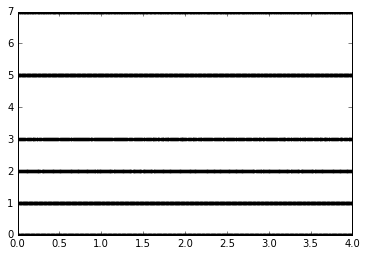

In [286]:
sys.run(3*np.random.standard_normal(np.array(sys.S.w).shape) )
sys.visualize()

INFO       No numerical integration method specified for group 'synapses_5', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_5', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_5', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_5', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_5', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


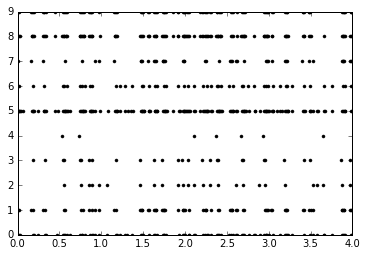

In [285]:
M1 = brian2.StateMonitor(sys.S, 'A_syn', record=True)
sys.net.add(M1)
sys.net.store()
sys.run(3*np.random.standard_normal(np.array(sys.S.w).shape) )
sys.visualize()

In [279]:
M1.A_syn

array([[  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
          1.34053397e-177,   1.31398962e-177,   1.28797089e-177],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
          1.57441915e-177,   1.54324356e-177,   1.51268529e-177],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
          5.08049029e-178,   4.97988984e-178,   4.88128142e-178],
       ..., 
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
         -3.83125707e-005,  -3.75539309e-005,  -3.68103133e-005],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
         -2.11448752e-004,  -2.07261787e-004,  -2.03157728e-004],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
         -1.14677548e-005,  -1.12406780e-005,  -1.10180977e-005]])

ValueError: x and y must have same first dimension

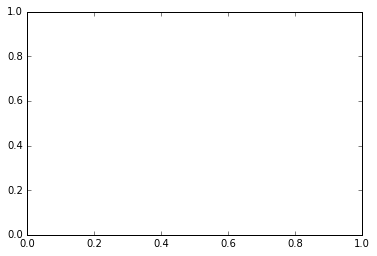

In [277]:
plt.figure()
plt.plot(M1.t/brian2.ms, M1.A_syn[0,1])

In [262]:
sys.S.w

<synapses_2.w: array([ 2.40545118,  1.53445147, -1.01387023, -2.68470074, -2.43815981,
       -1.47318049,  3.78996401,  1.82690631,  0.25728669,  1.95829694,
        0.20244331,  1.10582528,  3.31202199,  1.94822184, -1.03887676,
        4.85432534,  1.87584878, -2.50340638, -1.44583061, -2.80653273,
       -0.43938181,  0.66955053,  1.13040377, -3.74489001,  2.96038666,
        0.58071188, -0.85779984, -2.12981012, -2.66276338, -1.24864777,
       -0.23508738, -2.95905887, -1.91406501,  1.28373282,  4.35323615,
       -0.93289703,  3.30802135,  0.03437032, -3.09650546, -2.21732855,
       -4.20797176, -2.63037154, -2.89026628,  1.44465265,  1.01364613,
       -6.52088875, -2.81191475,  1.33982442, -1.56868886,  5.35902859,
       -1.46159744, -4.64341986,  2.16007573,  0.11988461, -1.12605389,
        4.03959219, -0.55601609, -0.75716424, -1.20997218, -5.04688783,
       -5.42555526, -1.00311616, -6.09070848, -1.63902922,  4.68457837,
       -3.90896027, -1.27257317, -1.09070894,  1.

In [257]:
sys.S.w

<synapses_1.w: array([ -3.27814039,   2.29013702,  -1.31245418,   0.11850548,
         1.56786035,   2.10634873,  -8.68807077,   2.69458621,
         3.15426016,  -0.96871194,  -1.71971747,   0.98740309,
         2.93448688,   2.10831864,  -1.24944937,  -4.19229188,
        -0.74252609,  -6.0472568 ,   1.28019988,  -2.59568823,
         0.5837301 ,   0.54482855,   2.33580105,  -3.5768219 ,
         7.29005507,  -2.44674298,  -0.72976822,   1.01725173,
        -0.91716052,  -1.30704026,  -1.22450731,   1.31994942,
         0.7797835 ,  -2.49318999,   2.12929975,  -2.06551711,
         4.55709099,  -1.85194403,  -2.93427214,   2.30789786,
         3.18002284,   2.05390189,   3.41428487,  -0.44076334,
        -0.98250961,   1.92169528,   2.32951159,   1.3517211 ,
         2.36880894,   2.19991262,  -3.98474524,  -0.23433653,
        -2.19829513,  -2.85490871,   1.92577781,   0.59356673,
        10.80443017,   1.55254608,   2.43672503,  -5.0521599 ,
         3.00791488,   0.0325329 ,  -3.6